## Please Run all the cells below before starting with model building

## Authenticate using your gmail id
### Run the below cell. After running the cell one link will appear -> Click on Link -> login using your gmail id ->copy the code -> paste it in the box -> done

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Counting no. of rows in a table
### Sample Code

In [0]:
%%bigquery --project bq-storage-flask-app df
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.stackoverflow.posts_questions`

,total_rows
0,17278709


## Setting up project Id globally

In [0]:
project_id = 'bq-storage-flask-app'

## Selecting approximately 2000 random rows from question dataset


In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.stackoverflow.posts_questions`''').to_dataframe().total[0]

df_questions = client.query('''
  SELECT
    *
  FROM
   `bigquery-public-data.stackoverflow.posts_questions`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

#print('Full dataset has %d rows' % row_count)
df_questions.head()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count
0,35282202,PHP how to set up timezone for sitemap.xml las...,<p>I am writing php sitemap generator for my s...,NaN,0,0,NaT,2016-02-09 01:00:42.607000+00:00,NaN,2016-02-09 01:00:42.607000+00:00,2017-05-23 11:59:13.487000+00:00,,-1.0,,2608382.0,1,2,php|mysql|sitemap|utc|dst,400
1,3050213,Oracle Connection exception via JDBC,<p>I have installed Oracle 11gR2 on my machine...,NaN,3,0,NaT,2010-06-16 01:47:18.340000+00:00,NaN,2010-06-16 10:39:43.183000+00:00,NaT,,NaN,,114864.0,1,0,oracle|jdbc,564
2,20288728,search plus symbol using jquery,<p>I want to search the <strong>+</strong> sym...,20288752.0,3,0,NaT,2013-11-29 15:12:48.283000+00:00,NaN,2013-11-29 16:03:22.290000+00:00,2013-11-29 16:02:57.973000+00:00,,2224265.0,,480232.0,1,0,jquery|css,55
3,1838163,Click and drag selection box in WPF,<p>Is it possible to implement mouse click and...,2019638.0,3,2,NaT,2009-12-03 06:55:25.077000+00:00,19.0,2016-11-07 23:17:02.200000+00:00,2011-08-31 17:49:50.657000+00:00,,305637.0,,199722.0,1,18,c#|wpf|mouse|selection|drag,26267
4,21464129,Can SQLAlchemy secondary tables be db.Model in...,<p>I'm working on a Flask-SQLAlchemy project a...,21465293.0,1,0,NaT,2014-01-30 18:02:35.523000+00:00,1.0,2014-01-30 19:03:35.913000+00:00,NaT,,NaN,,41728.0,1,0,python|sqlalchemy|flask-sqlalchemy,167


## Selecting approximately 2000 random rows from answer dataset

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.stackoverflow.posts_answers`''').to_dataframe().total[0]

df_answers = client.query('''
  SELECT
    *
  FROM
    `bigquery-public-data.stackoverflow.posts_answers`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

df_answers.head()

,id,body,comment_count,community_owned_date,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags
0,18257708,"<p>As you can see from this doc: <a href=""http...",0,NaT,2013-08-15 17:00:04.137000+00:00,2013-08-15 17:00:04.137000+00:00,NaT,,NaN,,2453522.0,18257569,2,12,
1,18824580,<pre><code>DECLARE @varName1 NVARCHAR(500); \...,2,NaT,2013-09-16 09:26:31.287000+00:00,2013-09-16 09:26:31.287000+00:00,NaT,,NaN,,1261518.0,18824447,2,0,
2,7001389,<p>What you really should be concerned about i...,0,NaT,2011-08-09 18:54:07.503000+00:00,2011-08-09 18:54:07.503000+00:00,NaT,,NaN,,879352.0,7000729,2,6,
3,41459433,<p>I do it like mentioned below: </p>\n\n<p>Th...,0,NaT,2017-01-04 08:39:21.723000+00:00,2017-01-05 06:55:51.500000+00:00,2017-01-05 06:55:51.500000+00:00,,1744480.0,,1744480.0,39055259,2,3,
4,48887523,<p>As suggested by @G. Grothendieck <code>as.y...,0,NaT,2018-02-20 14:29:12.710000+00:00,2018-02-20 14:29:12.710000+00:00,NaT,,NaN,,8580093.0,48886687,2,0,


## Merging the 2 datasets (Questions and Answers)
Note : Only 1 month data has been taken here (i.e. '2018-12-01' and '2019-01-01'). You can change the date range between July 2008 to March 2019. (Date Format: "yyyy-mm-dd")

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)


df_backup = client.query('''
Select 
b.id as question_id, a.id as answer_id, title,b.body as question_body,a.body as answer_body,a.body accepted_answer_id, 
answer_count, b.comment_count as que_comment_count, a.comment_count as ans_comment_count, b.community_owned_date, b.creation_date as que_creation_date,a.creation_date as ans_creation_date, b.favorite_count, b.last_activity_date, b.last_edit_date as que_last_edit_date, 
a.last_edit_date as ans_last_edit_date, b.last_editor_display_name, b.last_editor_user_id,b.owner_display_name, b.owner_user_id, b.post_type_id, b.score as que_score,a.score as ans_score, 
b.tags as que_tags,a.tags as ans_tags, view_count as que_view_count

from
(SELECT * FROM `bigquery-public-data.stackoverflow.posts_answers` 
where date(creation_date) between '2018-12-01' and '2019-01-01') as a
left join
(SELECT * FROM `bigquery-public-data.stackoverflow.posts_questions` 
where date(creation_date) between '2018-12-01' and '2019-01-01') as b

on a.parent_id = b.id

''').to_dataframe()

df_backup.head()



,question_id,answer_id,title,question_body,answer_body,accepted_answer_id,answer_count,que_comment_count,ans_comment_count,community_owned_date,...,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,que_score,ans_score,que_tags,ans_tags,que_view_count
0,53890999.0,53919318,WatchOS and location entitlement,<p>I've been working on adding a watchapp to a...,<p>Are you using latest Xcode? Did you set th...,<p>Are you using latest Xcode? Did you set th...,2.0,0.0,3,None,...,,231500.0,,231500.0,1.0,5.0,1,ios|watchkit|core-location,,91.0
1,53969183.0,53969221,How can I get the proper enum that implements ...,<p>I have the following interface:</p>\n\n<pre...,<p>You can use a mapping of planet names to re...,<p>You can use a mapping of planet names to re...,5.0,0.0,4,None,...,,964243.0,,939399.0,1.0,4.0,3,java|enums,,95.0
2,53824239.0,53824324,Python (Flask) serving Angular project's index...,<p>Does anyone know how to serve an Angular si...,"<p>As mentioned in Flask <a href=""http://flask...","<p>As mentioned in Flask <a href=""http://flask...",2.0,0.0,0,None,...,,NaN,,8930031.0,1.0,1.0,0,javascript|python|angular|flask,,184.0
3,53899066.0,53912586,"What could be the reason for ""TypeError: 'Stra...",<p>I have to deliver a Machine Learning projec...,<p>Try changing the following lines of tester....,<p>Try changing the following lines of tester....,1.0,1.0,2,None,...,,NaN,,10108493.0,1.0,-1.0,3,python-2.7|scikit-learn,,148.0
4,53961970.0,53966948,Equivalent of haskell TypeError in OCaml,<p>In Haskell it is possible to throw type err...,<p>I do not know of an equivalent to <code>Typ...,<p>I do not know of an equivalent to <code>Typ...,1.0,0.0,0,None,...,,NaN,,3143065.0,1.0,4.0,4,haskell|types|ocaml,,106.0


## Continue building your ML Model...All the Best!!

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = df_backup.copy()

In [0]:
df.dtypes

question_id                             float64
answer_id                                 int64
title                                    object
question_body                            object
answer_body                              object
accepted_answer_id                       object
answer_count                            float64
que_comment_count                       float64
ans_comment_count                         int64
community_owned_date                     object
que_creation_date           datetime64[ns, UTC]
ans_creation_date           datetime64[ns, UTC]
favorite_count                          float64
last_activity_date          datetime64[ns, UTC]
que_last_edit_date          datetime64[ns, UTC]
ans_last_edit_date          datetime64[ns, UTC]
last_editor_display_name                 object
last_editor_user_id                     float64
owner_display_name                       object
owner_user_id                           float64
post_type_id                            

In [0]:
df.shape

(189490, 26)

In [0]:
df.describe()

,question_id,answer_id,answer_count,que_comment_count,ans_comment_count,favorite_count,last_editor_user_id,owner_user_id,post_type_id,que_score,ans_score,que_view_count
count,1.502210e+05,1.894900e+05,150221.000000,150221.000000,189490.000000,19618.000000,8.716900e+04,1.488320e+05,150221.0,150221.000000,189490.000000,150221.000000
mean,5.378079e+07,5.378502e+07,1.893943,2.162960,1.169281,1.010450,5.189121e+06,7.000166e+06,1.0,0.521165,0.778337,79.563457
std,1.243490e+05,1.251404e+05,1.227178,2.842395,2.135474,1.704009,3.642417e+06,3.531105e+06,0.0,3.581385,2.017791,326.919082
min,5.356651e+07,5.356651e+07,1.000000,0.000000,0.000000,0.000000,-1.000000e+00,9.100000e+01,1.0,-17.000000,-7.000000,5.000000
25%,5.367286e+07,5.367647e+07,1.000000,0.000000,0.000000,0.000000,1.712135e+06,3.934049e+06,1.0,0.000000,0.000000,35.000000
50%,5.377997e+07,5.378539e+07,2.000000,1.000000,0.000000,1.000000,4.929531e+06,7.977416e+06,1.0,0.000000,0.000000,49.000000
75%,5.388809e+07,5.389317e+07,2.000000,3.000000,2.000000,1.000000,8.626173e+06,1.042526e+07,1.0,1.000000,1.000000,72.000000
max,5.403233e+07,5.403233e+07,30.000000,34.000000,36.000000,90.000000,1.104538e+07,1.108976e+07,1.0,201.000000,227.000000,18125.000000


In [0]:
df.replace('', np.nan, inplace=True)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

community_owned_date        100.000000
ans_tags                    100.000000
last_editor_display_name     99.739300
owner_display_name           99.228455
favorite_count               89.646947
ans_last_edit_date           71.800623
last_editor_user_id          53.998100
que_last_edit_date           53.743733
owner_user_id                21.456541
que_creation_date            20.723521
title                        20.723521
question_body                20.723521
answer_count                 20.723521
que_comment_count            20.723521
que_view_count               20.723521
last_activity_date           20.723521
post_type_id                 20.723521
que_score                    20.723521
que_tags                     20.723521
question_id                  20.723521
ans_creation_date             0.000000
ans_comment_count             0.000000
accepted_answer_id            0.000000
answer_body                   0.000000
ans_score                     0.000000
answer_id                

In [0]:
# Impute Missing values

# Drop unnecessary avriables
df.drop(['community_owned_date', 'post_type_id', 'owner_display_name', 'ans_tags', 'last_editor_display_name'], axis=1, inplace=True)

# Fill NaN with 0 value
df[['favorite_count', 'answer_count', 'que_comment_count', 'que_view_count', 'que_score']] = df[['favorite_count', 'answer_count', 'que_comment_count', 'que_view_count', 'que_score']].fillna(0)

# Drop if NA
df['question_id'] = df['question_id'].dropna(axis = 0, how ='any')


# Replace with Other Value
df['ans_last_edit_date'] = df['ans_last_edit_date'].fillna(df['ans_creation_date'])
df['title'] = df['title'].fillna('Other_title')
df['question_body'] = df['question_body'].fillna('other_question_body')
df['que_tags'] = df['que_tags'].fillna('No_tag')

df['que_last_edit_date'] = df['que_last_edit_date'].fillna(df['ans_creation_date'])
df['que_creation_date'] = df['que_creation_date'].fillna(df['ans_creation_date'])
df['last_activity_date'] = df['last_activity_date'].fillna(df['ans_creation_date'])
#df['owner_display_name'] = df['owner_display_name'].replace(0, 'user_known')

df = df.drop(df[df['last_editor_user_id'].isna()==True].index)
df = df.drop(df[df['owner_user_id'].isna()==True].index)
df = df.drop(df[df['question_id'].isna()==True].index)
#df = df.drop(df[df['owner_display_name'].isna()==True].index)

In [0]:
df.replace('', np.nan, inplace=True)
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

que_view_count         0.0
que_creation_date      0.0
answer_id              0.0
title                  0.0
question_body          0.0
answer_body            0.0
accepted_answer_id     0.0
answer_count           0.0
que_comment_count      0.0
ans_comment_count      0.0
ans_creation_date      0.0
que_tags               0.0
favorite_count         0.0
last_activity_date     0.0
que_last_edit_date     0.0
ans_last_edit_date     0.0
last_editor_user_id    0.0
owner_user_id          0.0
que_score              0.0
ans_score              0.0
question_id            0.0
dtype: float64

In [0]:
# Add a column as days_to_ans
df['days_to_ans'] = (df['ans_creation_date'] - df['que_creation_date']).dt.days
df['days_to_ans'].loc[df['days_to_ans'] < 0 ] = 0


df['days_to_ans_yes_no'] = df['days_to_ans'].apply(lambda x: 1 if x < 8 else 0)
df.drop(['days_to_ans'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#print(pd.to_datetime(df['ans_creation_date'])[0])

#df['last_activity_days'] = (df['last_activity_date'] - df['que_creation_date']).dt.days
#df['ans_last_edit_days'] = (df['ans_last_edit_date'] - df['que_creation_date']).dt.days
df['que_last_edit_days'] = (df['que_last_edit_date'] - df['que_creation_date']).dt.days


In [0]:
# Convert float to int
float_att = df.select_dtypes(include=['float64']).columns

df[float_att] = df[float_att].astype('int64')

In [0]:
df.dtypes

question_id                          int64
answer_id                            int64
title                               object
question_body                       object
answer_body                         object
accepted_answer_id                  object
answer_count                         int64
que_comment_count                    int64
ans_comment_count                    int64
que_creation_date      datetime64[ns, UTC]
ans_creation_date      datetime64[ns, UTC]
favorite_count                       int64
last_activity_date     datetime64[ns, UTC]
que_last_edit_date     datetime64[ns, UTC]
ans_last_edit_date     datetime64[ns, UTC]
last_editor_user_id                  int64
owner_user_id                        int64
que_score                            int64
ans_score                            int64
que_tags                            object
que_view_count                       int64
days_to_ans_yes_no                   int64
que_last_edit_days                   int64
dtype: obje

Random under-sampling:
1    85370
0    85370
Name: days_to_ans_yes_no, dtype: int64


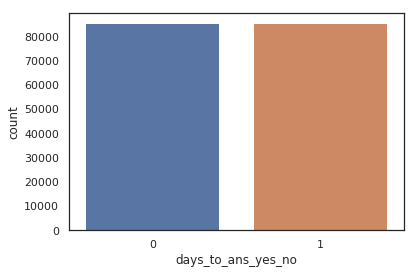

In [0]:
count_class_1, count_class_0 = df['days_to_ans_yes_no'].value_counts()

class_1 = df[df['days_to_ans_yes_no'] == 1]    
class_0 = df[df['days_to_ans_yes_no'] == 0]    
    
class_0_over = class_0.sample(count_class_1, replace=True)
df = pd.concat([class_1, class_0_over], axis=0)

print('Random under-sampling:')
print(df['days_to_ans_yes_no'].value_counts())

sns.countplot(df['days_to_ans_yes_no'])

In [0]:
cat_att = df.select_dtypes(include=['object'])
num_att = df.select_dtypes(include=['int64'])

cat_att.shape, num_att.shape

((170740, 5), (170740, 13))

In [0]:
cat_att.nunique()

title                 58037
question_body         58034
answer_body           86661
accepted_answer_id    86661
que_tags              37719
dtype: int64

In [0]:
# Drop varibales with many unique values
df.drop(['title', 'question_body', 'answer_body', 'accepted_answer_id', 'que_tags'], axis=1, inplace=True)

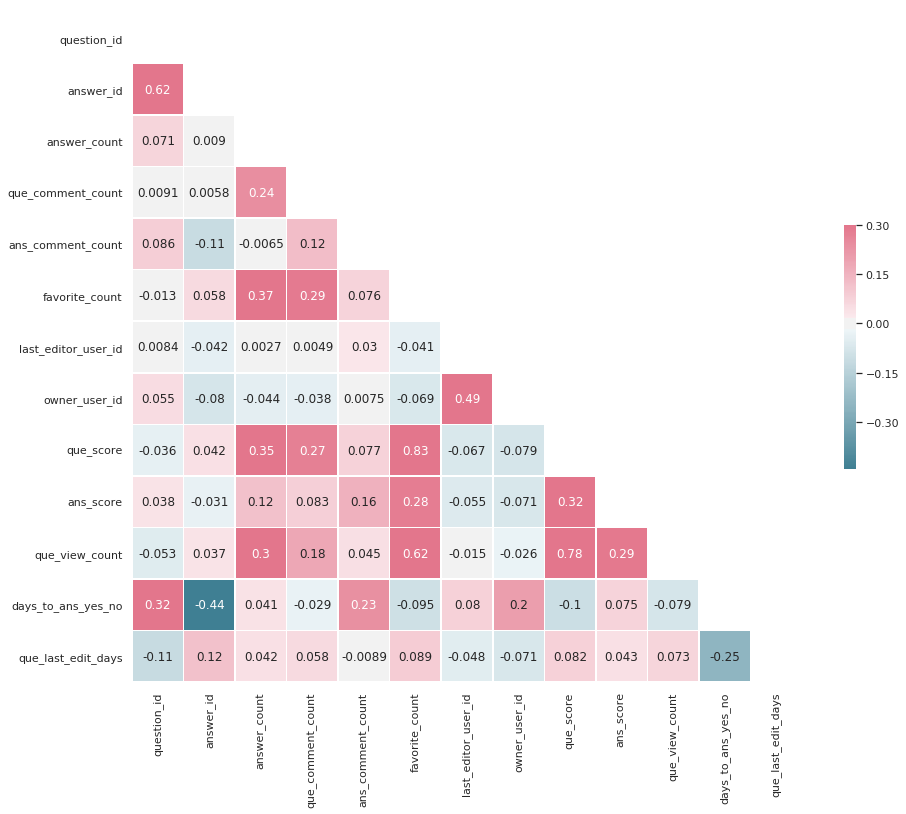

In [0]:
# Correlation Plot of Numeric attributes
sns.set(style="white")

corr = num_att.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)

corr.style.background_gradient().set_precision(2)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, annot=True,
            linewidths=.5, cbar_kws={"shrink": .3})

In [0]:
# Drop highly correlated variables
#df.drop(['answer_id', 'favorite_count'], axis=1, inplace=True)
df.drop(['answer_id'], axis=1, inplace=True)

In [0]:
cat_att = df.select_dtypes(include=['object'])
num_att = df.select_dtypes(include=['int64'])

cat_att.shape, num_att.shape

((170740, 0), (170740, 12))

In [0]:
# Standarding Numeric variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_att_scaled = pd.DataFrame(scaler.fit_transform(num_att), columns=num_att.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
num_att_scaled.head()
num_att_scaled.drop(['question_id', 'last_editor_user_id', 'owner_user_id'], axis=1, inplace=True)

In [0]:
y = df['days_to_ans_yes_no']
X = num_att_scaled
X.drop(['days_to_ans_yes_no'], axis=1, inplace=True)

y.shape, X.shape

((170740,), (170740, 8))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8988)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=898)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)

(122932, 8)
(122932,)
(30734, 8)
(30734,)
(17074, 8)


In [0]:
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

model_log = LogisticRegression(C=1, penalty='l1', random_state=234)

model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_val)

# Accuracy
print('Train Accuracy     :', accuracy_score(y_train, model_log.predict(X_train)))
print('Validation Accuracy:', accuracy_score(y_val, y_pred_log))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy     : 0.7493817720365731
Validation Accuracy: 0.7522613392334223


In [0]:
print('Confusion Metrix: \n', confusion_matrix(y_val, y_pred_log))
print('\n Classification Reports: \n', classification_report(y_val, y_pred_log))

Confusion Metrix: 
 [[11616  3855]
 [ 3759 11504]]

 Classification Reports: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     15471
           1       0.75      0.75      0.75     15263

   micro avg       0.75      0.75      0.75     30734
   macro avg       0.75      0.75      0.75     30734
weighted avg       0.75      0.75      0.75     30734



In [0]:
test_pred_log = model_log.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, test_pred_log))

Test Accuracy: 0.7512592245519504


In [0]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='auto')

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)

# Accuracy
print('Train Accuracy     :', accuracy_score(y_train, model_rf.predict(X_train)))
print('Validation Accuracy:', accuracy_score(y_val, y_pred_rf))

Train Accuracy     : 0.7679367455178473
Validation Accuracy: 0.7645278844276697


In [0]:
print('Confusion Metrix: \n', confusion_matrix(y_val, y_pred_rf))
print('\n Classification Reports: \n', classification_report(y_val, y_pred_rf))

Confusion Metrix: 
 [[12008  3463]
 [ 3774 11489]]

 Classification Reports: 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     15471
           1       0.77      0.75      0.76     15263

   micro avg       0.76      0.76      0.76     30734
   macro avg       0.76      0.76      0.76     30734
weighted avg       0.76      0.76      0.76     30734



In [0]:
test_pred_rf = model_rf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, test_pred_rf))

Test Accuracy: 0.7685369567763851


In [0]:
pd.DataFrame({'Features' : X_train.columns,
              'Scores'   : model_rf.feature_importances_*100 
             }).sort_values('Scores', ascending=False)

,Features,Scores
7,que_last_edit_days,33.831701
2,ans_comment_count,24.608567
6,que_view_count,20.162461
5,ans_score,7.460760
4,que_score,7.294475
0,answer_count,2.743204
3,favorite_count,2.623787
1,que_comment_count,1.275044


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, subsample=0.4, )

model_gbm.fit(X_train, y_train)

y_pred_gbm = model_gbm.predict(X_val)

# Accuracy
print('Train Accuracy     :', accuracy_score(y_train, model_gbm.predict(X_train)))
print('Validation Accuracy:', accuracy_score(y_val, y_pred_gbm))

Train Accuracy     : 0.799751081898936
Validation Accuracy: 0.7974881239018676


In [0]:
print('Confusion Metrix: \n', confusion_matrix(y_val, y_pred_gbm))
print('\n Classification Reports: \n', classification_report(y_val, y_pred_gbm))

Confusion Metrix: 
 [[12605  2866]
 [ 3358 11905]]

 Classification Reports: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     15471
           1       0.81      0.78      0.79     15263

   micro avg       0.80      0.80      0.80     30734
   macro avg       0.80      0.80      0.80     30734
weighted avg       0.80      0.80      0.80     30734



In [0]:
test_pred_gbm = model_gbm.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, test_pred_gbm))

Test Accuracy: 0.7993440318613096


In [0]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(max_depth=3, learning_rate=0.5, n_estimators=100, subsample=0.5, colsample_bytree=0.5, gamma=0.01, booster='gbtree')

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_val)

# Accuracy\n"
print('Train Accuracy     :', accuracy_score(y_train, model_xgb.predict(X_train)))
print('Validation Accuracy:', accuracy_score(y_val, y_pred_xgb))

Train Accuracy     : 0.8211124849510298
Validation Accuracy: 0.8170755515064749


In [0]:
print('Confusion Metrix: \n', confusion_matrix(y_val, y_pred_xgb))
print('\n Classification Reports: \n', classification_report(y_val, y_pred_xgb))

Confusion Metrix: 
 [[12945  2526]
 [ 3096 12167]]

 Classification Reports: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82     15471
           1       0.83      0.80      0.81     15263

   micro avg       0.82      0.82      0.82     30734
   macro avg       0.82      0.82      0.82     30734
weighted avg       0.82      0.82      0.82     30734



In [0]:
test_pred_xgb = model_xgb.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, test_pred_xgb))

Test Accuracy: 0.8186130959353403
